In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot  as plt

from sklearn.model_selection import train_test_split

In [14]:
df = pd.read_csv('titanic.csv',usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [15]:
df.isnull().mean()

Survived    0.000000
Age         0.205742
Fare        0.002392
dtype: float64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns= ['Survived']), df['Survived'], test_size= 0.2)
X_train['Age_imputed']= X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [17]:

X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values
X_train.sample(5)

/var/folders/cl/nx895lk15wz0q6n08sgg8vtr0000gn/T/ipykernel_61225/3979929760.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().

,Age,Fare,Age_imputed
194,8.0,32.5000,8.0
33,NaN,23.4500,24.0
79,24.0,7.7500,24.0
322,26.0,13.0000,26.0
112,36.0,31.6792,36.0


In [18]:
print('Original variance :' ,X_train['Age'].var())
print('New variance :' ,X_train['Age_imputed'].var())

Original variance : 194.10105568785295
New variance : 195.70168393303484


In [20]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()


,Fare,Age,Age_imputed
Fare,2458.984160,212.953099,161.872554
Age,212.953099,194.101056,194.101056
Age_imputed,161.872554,194.101056,195.701684


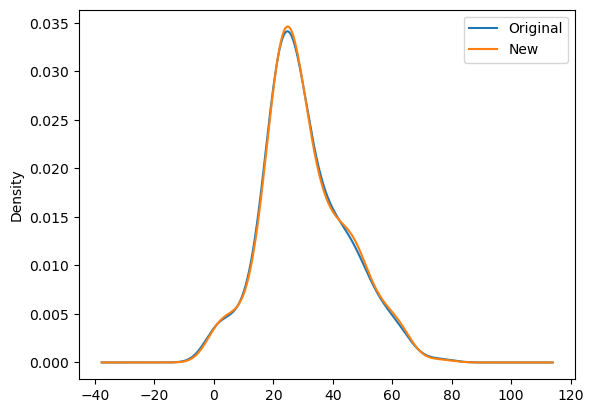

In [23]:
X_train['Age'].plot(kind= 'kde', label= 'Original')
X_train['Age_imputed'].plot(kind= 'kde', label= 'New')
plt.legend()
plt.show()

In [25]:
# Now if you are using this on production level then u can not generate a random value for the same input
# So u have to make sure that u r generting same random value for similar inputs.
# for that just add this line of code 
#sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

##### For categorical data:

In [27]:
data = pd.read_csv('SalePrice.csv', usecols= ['GarageQual', 'FireplaceQu','SalePrice'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [33]:
X_train.isnull().mean()

FireplaceQu            0.470034
GarageQual             0.059075
SalePrice              0.000000
GarageQual_imputed     0.000000
FireplaceQu_imputed    0.000000
dtype: float64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data, data['SalePrice'], test_size= 0.2)
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [30]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1333,NaN,TA,125500,TA,NaN
328,NaN,TA,214500,TA,NaN
158,Gd,TA,254900,TA,Gd
326,Gd,TA,324000,TA,Gd
925,NaN,TA,175000,TA,NaN


In [31]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

/var/folders/cl/nx895lk15wz0q6n08sgg8vtr0000gn/T/ipykernel_61225/856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_tr

In [32]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
563,Gd,TA,185000,TA,Gd
18,NaN,TA,159000,TA,Fa
1391,NaN,TA,124000,TA,TA
564,TA,TA,268000,TA,TA
428,NaN,TA,195400,TA,Gd


In [34]:
# For categorical data we take the ratio:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(data)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.499192,0.404110
TA,0.402262,0.317123
Fa,0.038772,0.031507
Ex,0.033926,0.027397
Po,0.025848,0.019863
